<a href="https://colab.research.google.com/github/Louma20/PricePredector/blob/main/Bootcamp_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset includes the following columns
* **battery_power:** Total energy a battery can store in one time measured in mAh
* **blue:** Has bluetooth or not
* **clock_speed:** speed at which microprocessor executes instructions
* **dual_sim:**Has dual sim support or not
* **fc:**Front Camera mega pixels
* **four_g:**Has 4G or not
* **int_memory:**Internal Memory in Gigabytes
* **m_dep:**Mobile Depth in cm
* **mobile_wt:**Weight of mobile phone
* **n_cores:**Number of cores of processor
* **pc:** Primary Camera mega pixels
* **px_height:** Pixel Resolution Height
* **px_width:**Pixel Resolution Width
* **ram:** Random Access Memory in Mega Bytes
* **sc_h:** Screen Height of mobile in cm
* **sc_w:** Screen Width of mobile in cm
* **talk_time:** longest time that a single battery charge will last when you are talking
* **three_g:** Has 3G or not
* **touch_screen:** Has touch screen or not
* **wifi:** Has wifi or not
* **price_range:** 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

# Data Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path="/content/train.csv"

In [ ]:
data = pd.read_csv(path)
dataset = data.values

# split X and Y features
X = dataset[["battery_power","px_width","ram"]].astype(float)
Y = dataset[:,20]
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


IndexError: ignored

# EDA

In [ ]:
rows = data.shape[0]
columns = data.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 2000 rows and 21 columns.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Correlations

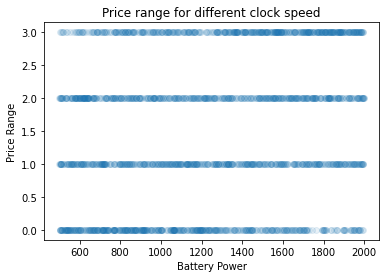

In [ ]:
plt.scatter(data["battery_power"],data["price_range"],alpha=0.1)
plt.title("Price range for different clock speed")
plt.xlabel("Battery Power")
plt.ylabel("Price Range")
plt.show()

#For low price phone, the battery_power is more often low, and for high price phones, 
#the battery power is more often high. We can see this from the intensity of the color.

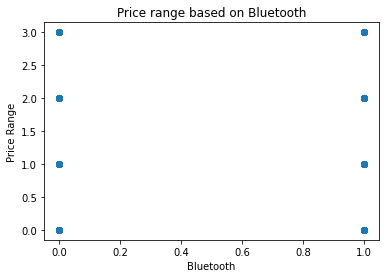

In [ ]:
plt.scatter(data["blue"],data["price_range"])
plt.title("Price range based on Bluetooth")
plt.xlabel("Bluetooth")
plt.ylabel("Price Range")
plt.show()

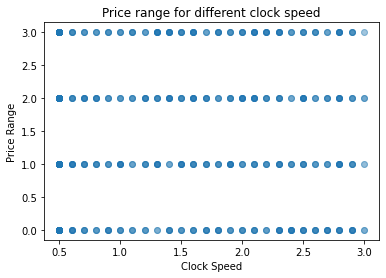

In [ ]:
plt.scatter(data["clock_speed"],data["price_range"],alpha=0.1)
plt.title("Price range for different clock speed")
plt.xlabel("Clock Speed")
plt.ylabel("Price Range")
plt.show()

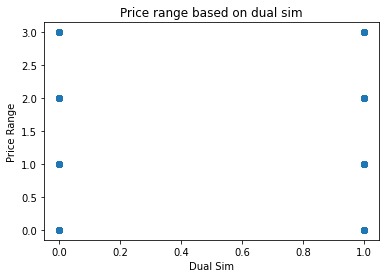

In [ ]:
plt.scatter(data["dual_sim"],data["price_range"],alpha=0.1)
plt.title("Price range based on dual sim")
plt.xlabel("Dual Sim")
plt.ylabel("Price Range")
plt.show()
#same intensity

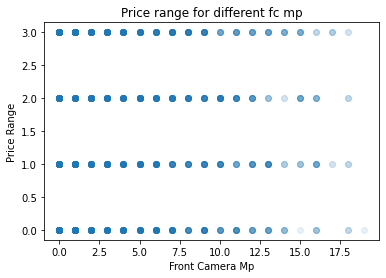

In [ ]:
plt.scatter(data["fc"],data["price_range"],alpha=0.1)
plt.title("Price range for different fc mp")
plt.xlabel("Front Camera Mp")
plt.ylabel("Price Range")
plt.show()

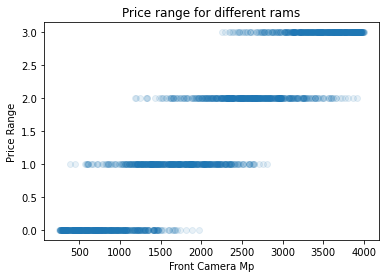

In [ ]:
plt.scatter(data["ram"],data["price_range"],alpha=0.1)
plt.title("Price range for different rams")
plt.xlabel("Front Camera Mp")
plt.ylabel("Price Range")
plt.show()
#There is a clear correlation between the ram and the price range of a cell phone

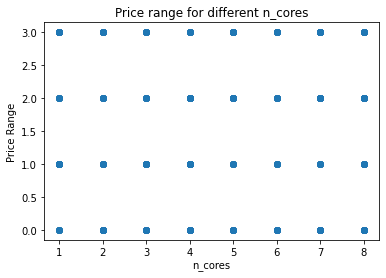

In [ ]:
plt.scatter(data["n_cores"],data["price_range"], alpha = 0.1)
plt.title("Price range for different n_cores")
plt.xlabel("n_cores")
plt.ylabel("Price Range")
plt.show()
#we can remove the n_cores column
#We almost have the same intensity, so apparently, no strong correlation between n_cores and price_range

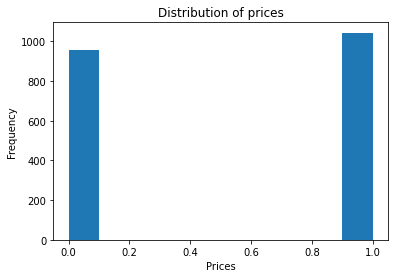

In [ ]:
data["four_g"].plot(kind='hist')
plt.title("Distribution of prices")
plt.xlabel("Prices")
plt.ylabel("Frequency")
plt.show()

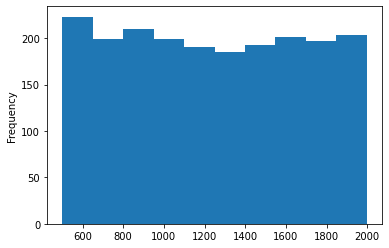

In [ ]:
data['battery_power'].plot(kind='hist')
#We have almost a uniform distribution but phones with low battery power are slightly more than the others.

In [ ]:
#To see the number of examples having a particular value in a categorical variable, we use the df[variable].value_counts(). 
#This would return a series having the unique values along with their counts for that variable. Let's do this for the clock_speed variable.
clock_speed_value_counts = data['clock_speed'].value_counts()
clock_speed_value_counts

0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64

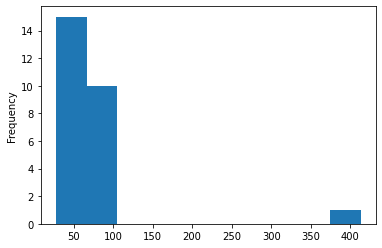

In [ ]:
clock_speed_value_counts.plot(kind='hist')
#we will see that the majority of the cell phones in our dataset have a 0.5 GHz clock speed

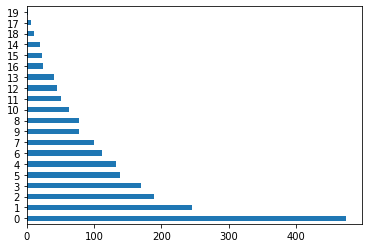

In [ ]:
data['fc'].value_counts().plot(kind='barh')
#The majority of the phones in the dataset have 0 MPixels front Camera (meaning no front camera)

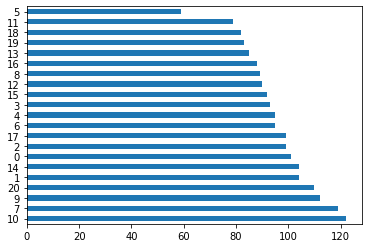

In [ ]:
data['pc'].value_counts().plot(kind='barh')
#We can see that the majority of the phones have 10 MP primary camera, and even some of them has 0 MP which means they have no camera at all.

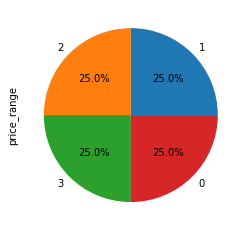

In [ ]:
data['price_range'].value_counts().plot.pie(autopct='%1.1f%%')
#we have a perfectly balanced dataset

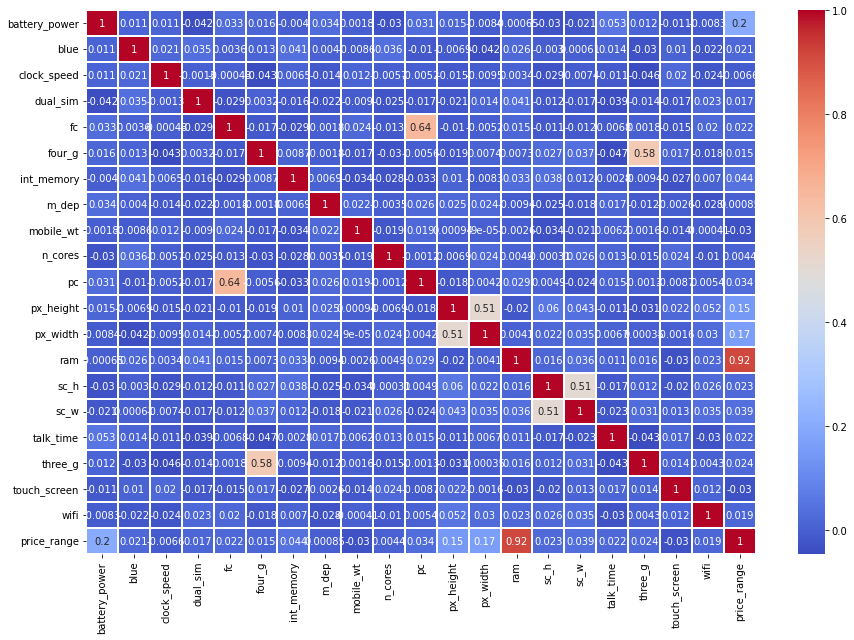

In [ ]:
import seaborn as sns
correlation_map = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_map, annot=True, cmap="coolwarm", linecolor='white', linewidths=1)

In [ ]:
# Get the correlation of all the features with the target variable
correlation_with_target = abs(correlation_map['price_range'])

# Filter the series you obtained to have only the features that have a correlation with the target variable > 0.15 
relevant_features = correlation_with_target[correlation_with_target > 0.15]
relevant_features

battery_power    0.200723
px_width         0.165818
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

# Define Keras Model

## One-hot Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# encode class values as integers
encoder= LabelEncoder()
encoder.fit(Y) #unique classes we have
encoder_y=encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y=to_categorical(encoder_y)

## Build Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model():
  model=Sequential()
  model.add(Dense(21,activation='relu',input_dim=20))
  model.add(Dense(11,activation='relu'))
  model.add(Dense(4,activation='softmax'))
  model.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=["accuracy"]) 
  #with optimizer 'RMSprop' it gave 0.89 accuracy after 3000 epochs=> it takes time, with adam gave 0.78
  return model

## Train & eval <font color='pink'>**Before**</font> normalization

In [ ]:
model=create_model()
model.fit(X, dummy_y, epochs=100, batch_size=5)

Epoch 1/100
400/400 [==============================] - 1s 2ms/step - loss: 20.3110 - accuracy: 0.3790
Epoch 2/100
400/400 [==============================] - 1s 2ms/step - loss: 5.3251 - accuracy: 0.4865
Epoch 3/100
400/400 [==============================] - 1s 2ms/step - loss: 3.7141 - accuracy: 0.5360
Epoch 4/100
400/400 [==============================] - 1s 2ms/step - loss: 3.2580 - accuracy: 0.5505
Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 2.8204 - accuracy: 0.5780
Epoch 6/100
400/400 [==============================] - 1s 2ms/step - loss: 2.6328 - accuracy: 0.5830
Epoch 7/100
400/400 [==============================] - 1s 2ms/step - loss: 2.5077 - accuracy: 0.6050
Epoch 8/100
400/400 [==============================] - 1s 2ms/step - loss: 2.1604 - accuracy: 0.6260
Epoch 9/100
400/400 [==============================] - 1s 2ms/step - loss: 2.0709 - accuracy: 0.6350
Epoch 10/100
400/400 [==============================] - 1s 2ms/step - loss: 1.9576 - accur

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 21)                441       
                                                                 
 dense_4 (Dense)             (None, 11)                242       
                                                                 
 dense_5 (Dense)             (None, 4)                 48        
                                                                 
Total params: 731
Trainable params: 731
Non-trainable params: 0
_________________________________________________________________


##Normalization

In [ ]:
data_max = data.max()
data_max

battery_power    1998.0
blue                1.0
clock_speed         3.0
dual_sim            1.0
fc                 19.0
four_g              1.0
int_memory         64.0
m_dep               1.0
mobile_wt         200.0
n_cores             8.0
pc                 20.0
px_height        1960.0
px_width         1998.0
ram              3998.0
sc_h               19.0
sc_w               18.0
talk_time          20.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         3.0
dtype: float64

In [ ]:
data = data.divide(data_max)
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.619879,0.4950,0.507417,0.509500,0.226816,0.521500,0.500727,0.501750,0.701245,0.565063,...,0.329137,0.626384,0.531319,0.647711,0.320389,0.550550,0.761500,0.503000,0.507000,0.500000
std,0.219929,0.5001,0.272001,0.500035,0.228497,0.499662,0.283527,0.288416,0.176998,0.285980,...,0.226419,0.216316,0.271319,0.221750,0.242022,0.273198,0.426273,0.500116,0.500076,0.372771
min,0.250751,0.0000,0.166667,0.000000,0.000000,0.000000,0.031250,0.100000,0.400000,0.125000,...,0.000000,0.250250,0.064032,0.263158,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,0.426301,0.0000,0.233333,0.000000,0.052632,0.000000,0.250000,0.200000,0.545000,0.375000,...,0.144260,0.437813,0.302026,0.473684,0.111111,0.300000,1.000000,0.000000,0.000000,0.250000
50%,0.613614,0.0000,0.500000,1.000000,0.157895,1.000000,0.500000,0.500000,0.705000,0.500000,...,0.287755,0.624124,0.536893,0.631579,0.277778,0.550000,1.000000,1.000000,1.000000,0.500000
75%,0.808433,1.0000,0.733333,1.000000,0.368421,1.000000,0.750000,0.800000,0.850000,0.875000,...,0.483291,0.817317,0.766508,0.842105,0.500000,0.800000,1.000000,1.000000,1.000000,0.750000
max,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train & evaluate after normalization

In [ ]:
data.drop("n_cores", axis=1,inplace=True)
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split
xn_train, xn_test, yn_train, yn_test = train_test_split(X, dummy_y, test_size=0.20, random_state=5)

In [ ]:
model=create_model()
model.fit(xn_train, yn_train, epochs=100, batch_size=5)

Epoch 1/100


ValueError: ignored

In [ ]:
model.evaluate(xn_test,yn_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.8600


[0.628562867641449, 0.8600000143051147]

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=12)
results = cross_val_score(model, X, dummy_y, cv=kfold)
print("%.2f%%" % (results.mean() * 100))

TypeError: ignored

# Train & eval: Cross-Validation: <font color='red'>DIDN'T WORK</font>

In [ ]:
!pip install scikeras[tensorflow]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(Y[1])

2.0


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from scikeras.wrappers import KerasClassifier, KerasRegressor

# evaluate model with dataset
estimator = KerasClassifier(model=create_model, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=15)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

ValueError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier, KerasRegressor

# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=100, batch_size=5, verbose=0)))

pipeline = Pipeline(estimators)

In [ ]:
from sklearn.model_selection import cross_val_score
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=15)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# Other Models

## KNN

In [ ]:
#for a better understanding of our data and correlation we use the heatmap.

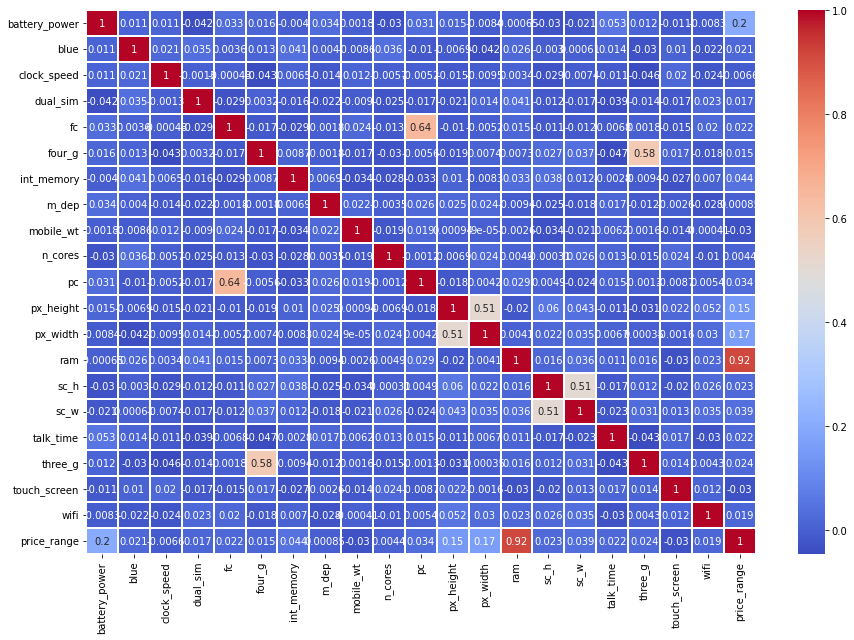

In [ ]:
import seaborn as sns
correlation_map = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_map, annot=True, cmap="coolwarm", linecolor='white', linewidths=1)

Ideally, We need the features to have no correlation between each other, and we need them to have high correlation with the target variable.
Now, we will drop the features whose correltion with the target is less than 0.15



In [ ]:
# Get the correlation of all the features with the target variable
correlation_with_target = abs(correlation_map['price_range'])

# Filter the series you obtained to have only the features that have a correlation with the target variable > 0.15 
relevant_features = correlation_with_target[correlation_with_target > 0.15]
relevant_features

battery_power    0.200723
px_width         0.165818
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

In [ ]:
data = pd.read_csv(path)
#Take features and targets out of our dataset
x = data[['battery_power','clock_speed','fc','four_g','int_memory','m_dep','mobile_wt',	'n_cores','px_height','px_width','ram','sc_h','sc_w',	'talk_time']]
y = data.iloc[:,-1].values 
#Normalize the data
x = x.divide(x.max())
x.head()

,battery_power,clock_speed,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0.421421,0.733333,0.052632,0.0,0.109375,0.6,0.940,0.250,0.010204,0.378378,0.637569,0.473684,0.388889,0.95
1,0.511011,0.166667,0.000000,1.0,0.828125,0.7,0.680,0.375,0.461735,0.994995,0.658079,0.894737,0.166667,0.35
2,0.281782,0.166667,0.105263,1.0,0.640625,0.9,0.725,0.625,0.644388,0.858859,0.651076,0.578947,0.111111,0.45
3,0.307808,0.833333,0.000000,0.0,0.156250,0.8,0.655,0.750,0.620408,0.893894,0.692596,0.842105,0.444444,0.55
4,0.911411,0.400000,0.684211,1.0,0.687500,0.6,0.705,0.250,0.616327,0.606607,0.352926,0.421053,0.111111,0.75


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Define the knn model
knn = KNeighborsClassifier(n_neighbors=3)
#Fit the knn on the training set
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Get the accuracy
accuracy = knn.score(x_train, y_train)
print (accuracy)

0.7775


In [ ]:
# Plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x_test, y_test)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
# Plotting decision region
 plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations
 plt.xlabel(‘X’)
 plt.ylabel(‘Y’)
 plt.title(‘Knn with K=’+ str(k))
 plt.show()

In [ ]:
data1 = pd.read_csv(‘ushape.csv’)
for i in [1,5,20,30,40,80]:
    knn_comparison(data1, i)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Define the logistic regression model
lreg =LogisticRegression()
# Fit the model on the training set
lreg.fit(x_train, y_train)

In [ ]:
#Compute the accuracy
accuracy = lreg.score(x_train, y_train)
print(accuracy)